In [4]:

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [5]:
db = pd.read_csv("./MICRODADOS_ENEM_2022.csv", sep=';', encoding='ISO-8859-1')
db.dropna(inplace=True)
db.reset_index(drop=True, inplace=True)
raca = db['TP_COR_RACA']
sexo = db['TP_SEXO']
tp_escola = db['TP_ESCOLA']
target = db['NU_NOTA_MT']
nota_lc = db['NU_NOTA_LC']
nota_ch = db['NU_NOTA_CH']
nota_cn = db['NU_NOTA_CN']
print(raca)

0         3
1         1
2         3
3         3
4         1
         ..
681895    3
681896    1
681897    1
681898    3
681899    1
Name: TP_COR_RACA, Length: 681900, dtype: int64


In [6]:
total_pessoas = len(raca)
raca = pd.Categorical(raca)
#raca = raca.rename_categories(['ND','B','PT','PD','A','I'])
raca = raca.rename_categories(['ND', 'Branco', 'Preto', 'Pardo', 'Amarelo', 'Indígena'])
lista_racas = ['ND', 'Branco', 'Preto', 'Pardo', 'Amarelo', 'Indígena']

l_contagem_raca = []

for i in lista_racas:
    raca2 = list(raca)
    l_contagem_raca.append(raca2.count(i))

db['TP_COR_RACA'] = raca



Analise da variavel Target comparada a diferentes racas

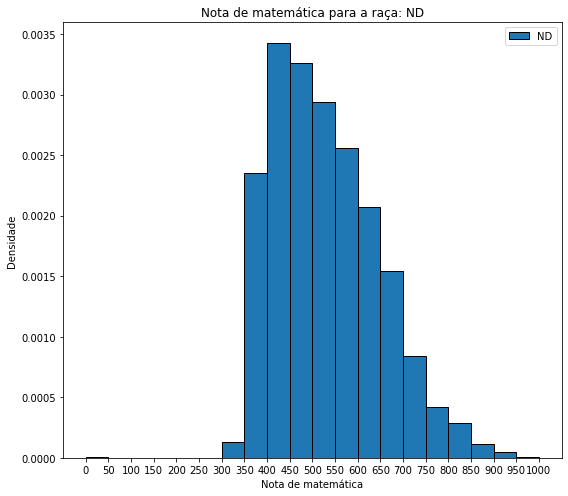

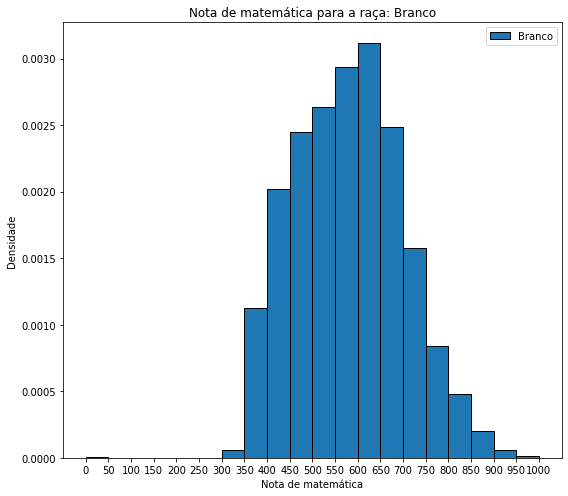

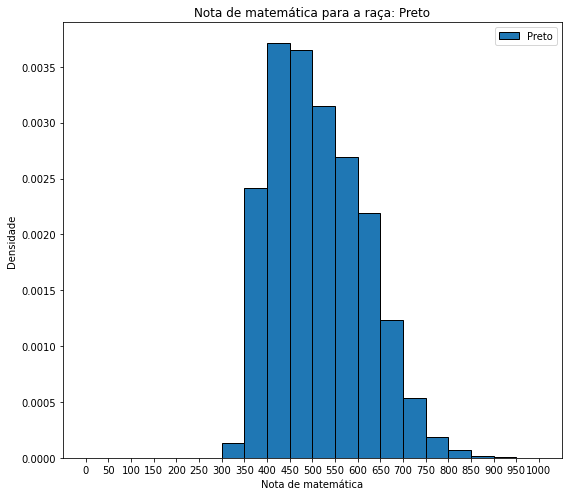

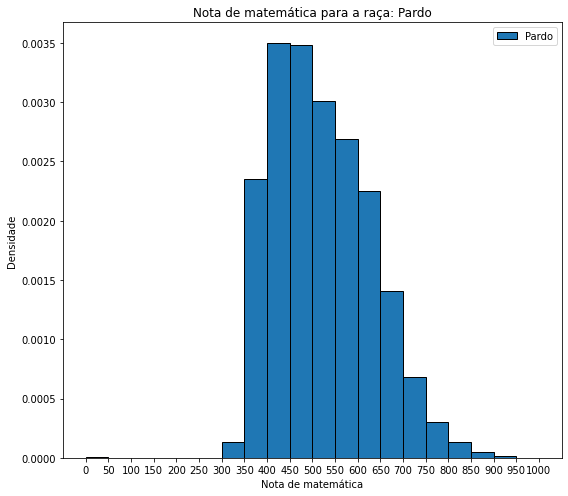

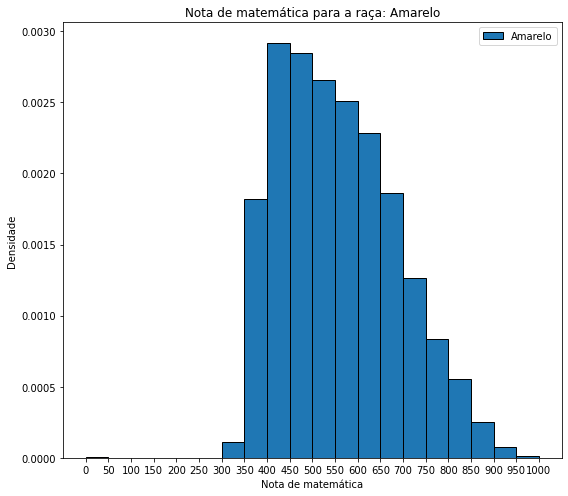

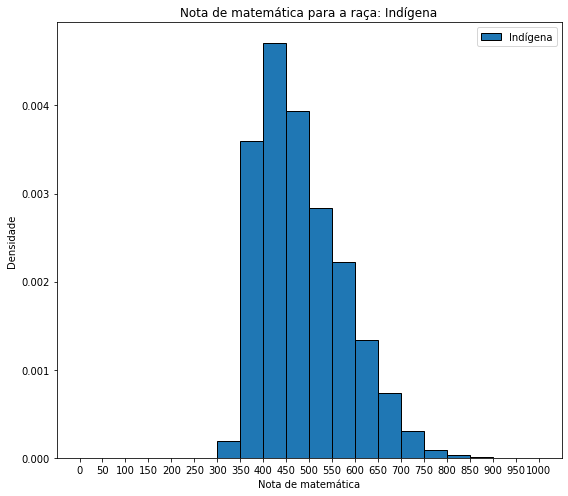

In [7]:

for i in range(len(lista_racas)):
    nota_raca_atual = db.loc[db.TP_COR_RACA == lista_racas[i], 'NU_NOTA_MT']
    lim = np.linspace(0, 1000, 21)
    plt.figure(figsize=(8, 7))
    #plt.hist(l_contagem_raca[i]/total_pessoas, bins=lim, edgecolor='black', density=True, label=i)
    plt.hist(nota_raca_atual, bins=lim, edgecolor='black', density=True, label=lista_racas[i])
    plt.title(f'Nota de matemática para a raça: {lista_racas[i]}')
    plt.ylabel('Densidade')
    plt.xlabel('Nota de matemática')
    plt.xticks(lim)
    plt.legend()
    plt.tight_layout()
    plt.show()






Analise da variavel Target comparada a diferentes sexos

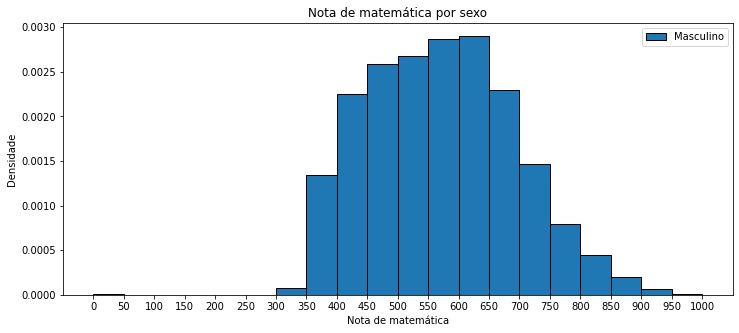

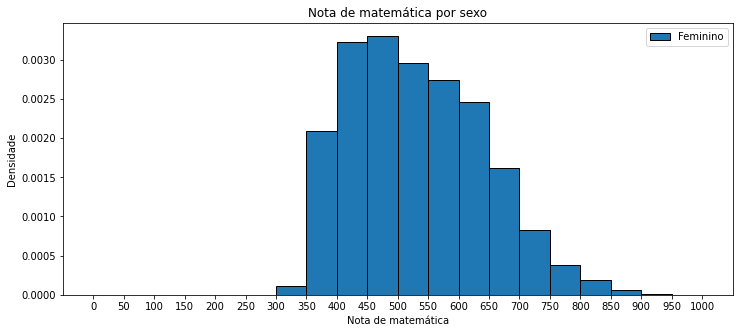

In [8]:
nota_M = db.loc[db.TP_SEXO == 'M', 'NU_NOTA_MT']
nota_F = db.loc[db.TP_SEXO == 'F', 'NU_NOTA_MT']


amp = np.linspace(0, 1000, 21)
plt.figure(figsize=(12, 5))
plt.hist(nota_M, bins=amp, edgecolor='black', density=True, label='Masculino')
plt.title('Nota de matemática por sexo')
plt.ylabel('Densidade')
plt.xlabel('Nota de matemática')
plt.xticks(amp)
plt.legend()
plt.show()

amp1 = np.linspace(0, 1000, 21)
plt.figure(figsize=(12, 5))
plt.hist(nota_F, bins=amp1, edgecolor='black', density=True, label='Feminino')
plt.title('Nota de matemática por sexo')
plt.ylabel('Densidade')
plt.xlabel('Nota de matemática')
plt.xticks(amp1)
plt.legend()
plt.show()



Analise da variavel Target comparada a diferentes tipos de escola

Series([], Name: NU_NOTA_MT, dtype: float64)


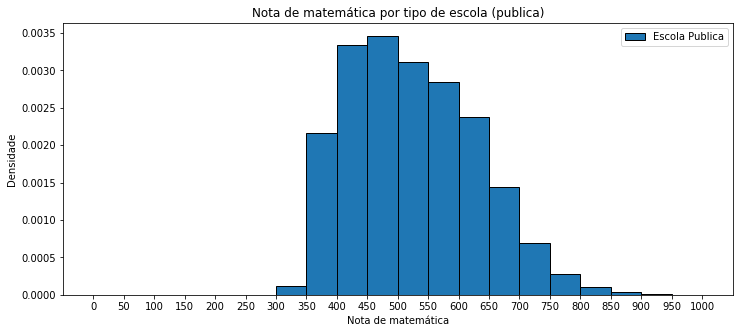

d:\Anaconda\lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


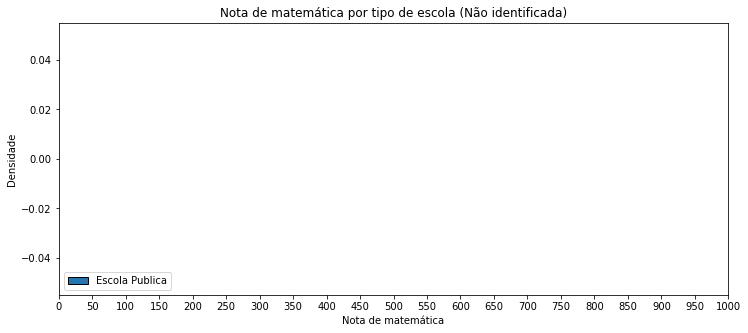

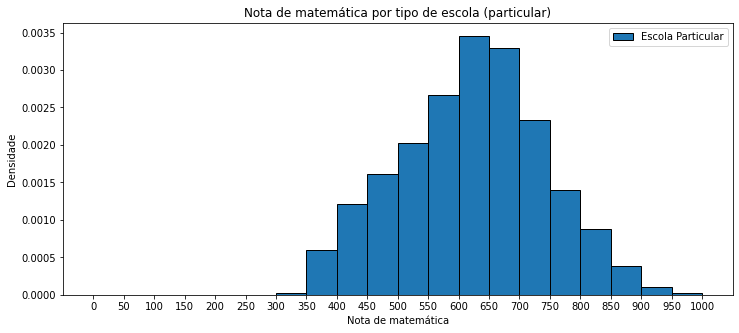

In [9]:
nota_nao_falou = db.loc[db.TP_ESCOLA == 1, 'NU_NOTA_MT']
nota_Part = db.loc[db.TP_ESCOLA == 3, 'NU_NOTA_MT']
nota_Pub = db.loc[db.TP_ESCOLA == 2 , 'NU_NOTA_MT']

#1: Não declarou, 2: Publica, 3: Particular
print(nota_nao_falou)


lim = np.linspace(0, 1000, 21)
plt.figure(figsize=(12, 5))
plt.hist(nota_Pub, bins=amp, edgecolor='black', density=True, label='Escola Publica')
plt.title('Nota de matemática por tipo de escola (publica)')
plt.ylabel('Densidade')
plt.xlabel('Nota de matemática')
plt.xticks(lim)
plt.legend()
plt.show()

lim = np.linspace(0, 1000, 21)
plt.figure(figsize=(12, 5))
plt.hist(nota_nao_falou, bins=amp, edgecolor='black', density=True, label='Escola Publica')
plt.title('Nota de matemática por tipo de escola (Não identificada)')
plt.ylabel('Densidade')
plt.xlabel('Nota de matemática')
plt.xticks(lim)
plt.legend()
plt.show()

lim = np.linspace(0, 1000, 21)
plt.figure(figsize=(12, 5))
plt.hist(nota_Part, bins=amp, edgecolor='black', density=True, label='Escola Particular')
plt.title('Nota de matemática por tipo de escola (particular)')
plt.ylabel('Densidade')
plt.xlabel('Nota de matemática')
plt.xticks(lim)
plt.legend()
plt.show()

d:\Anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\lib\site-packages\seaborn\_c

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

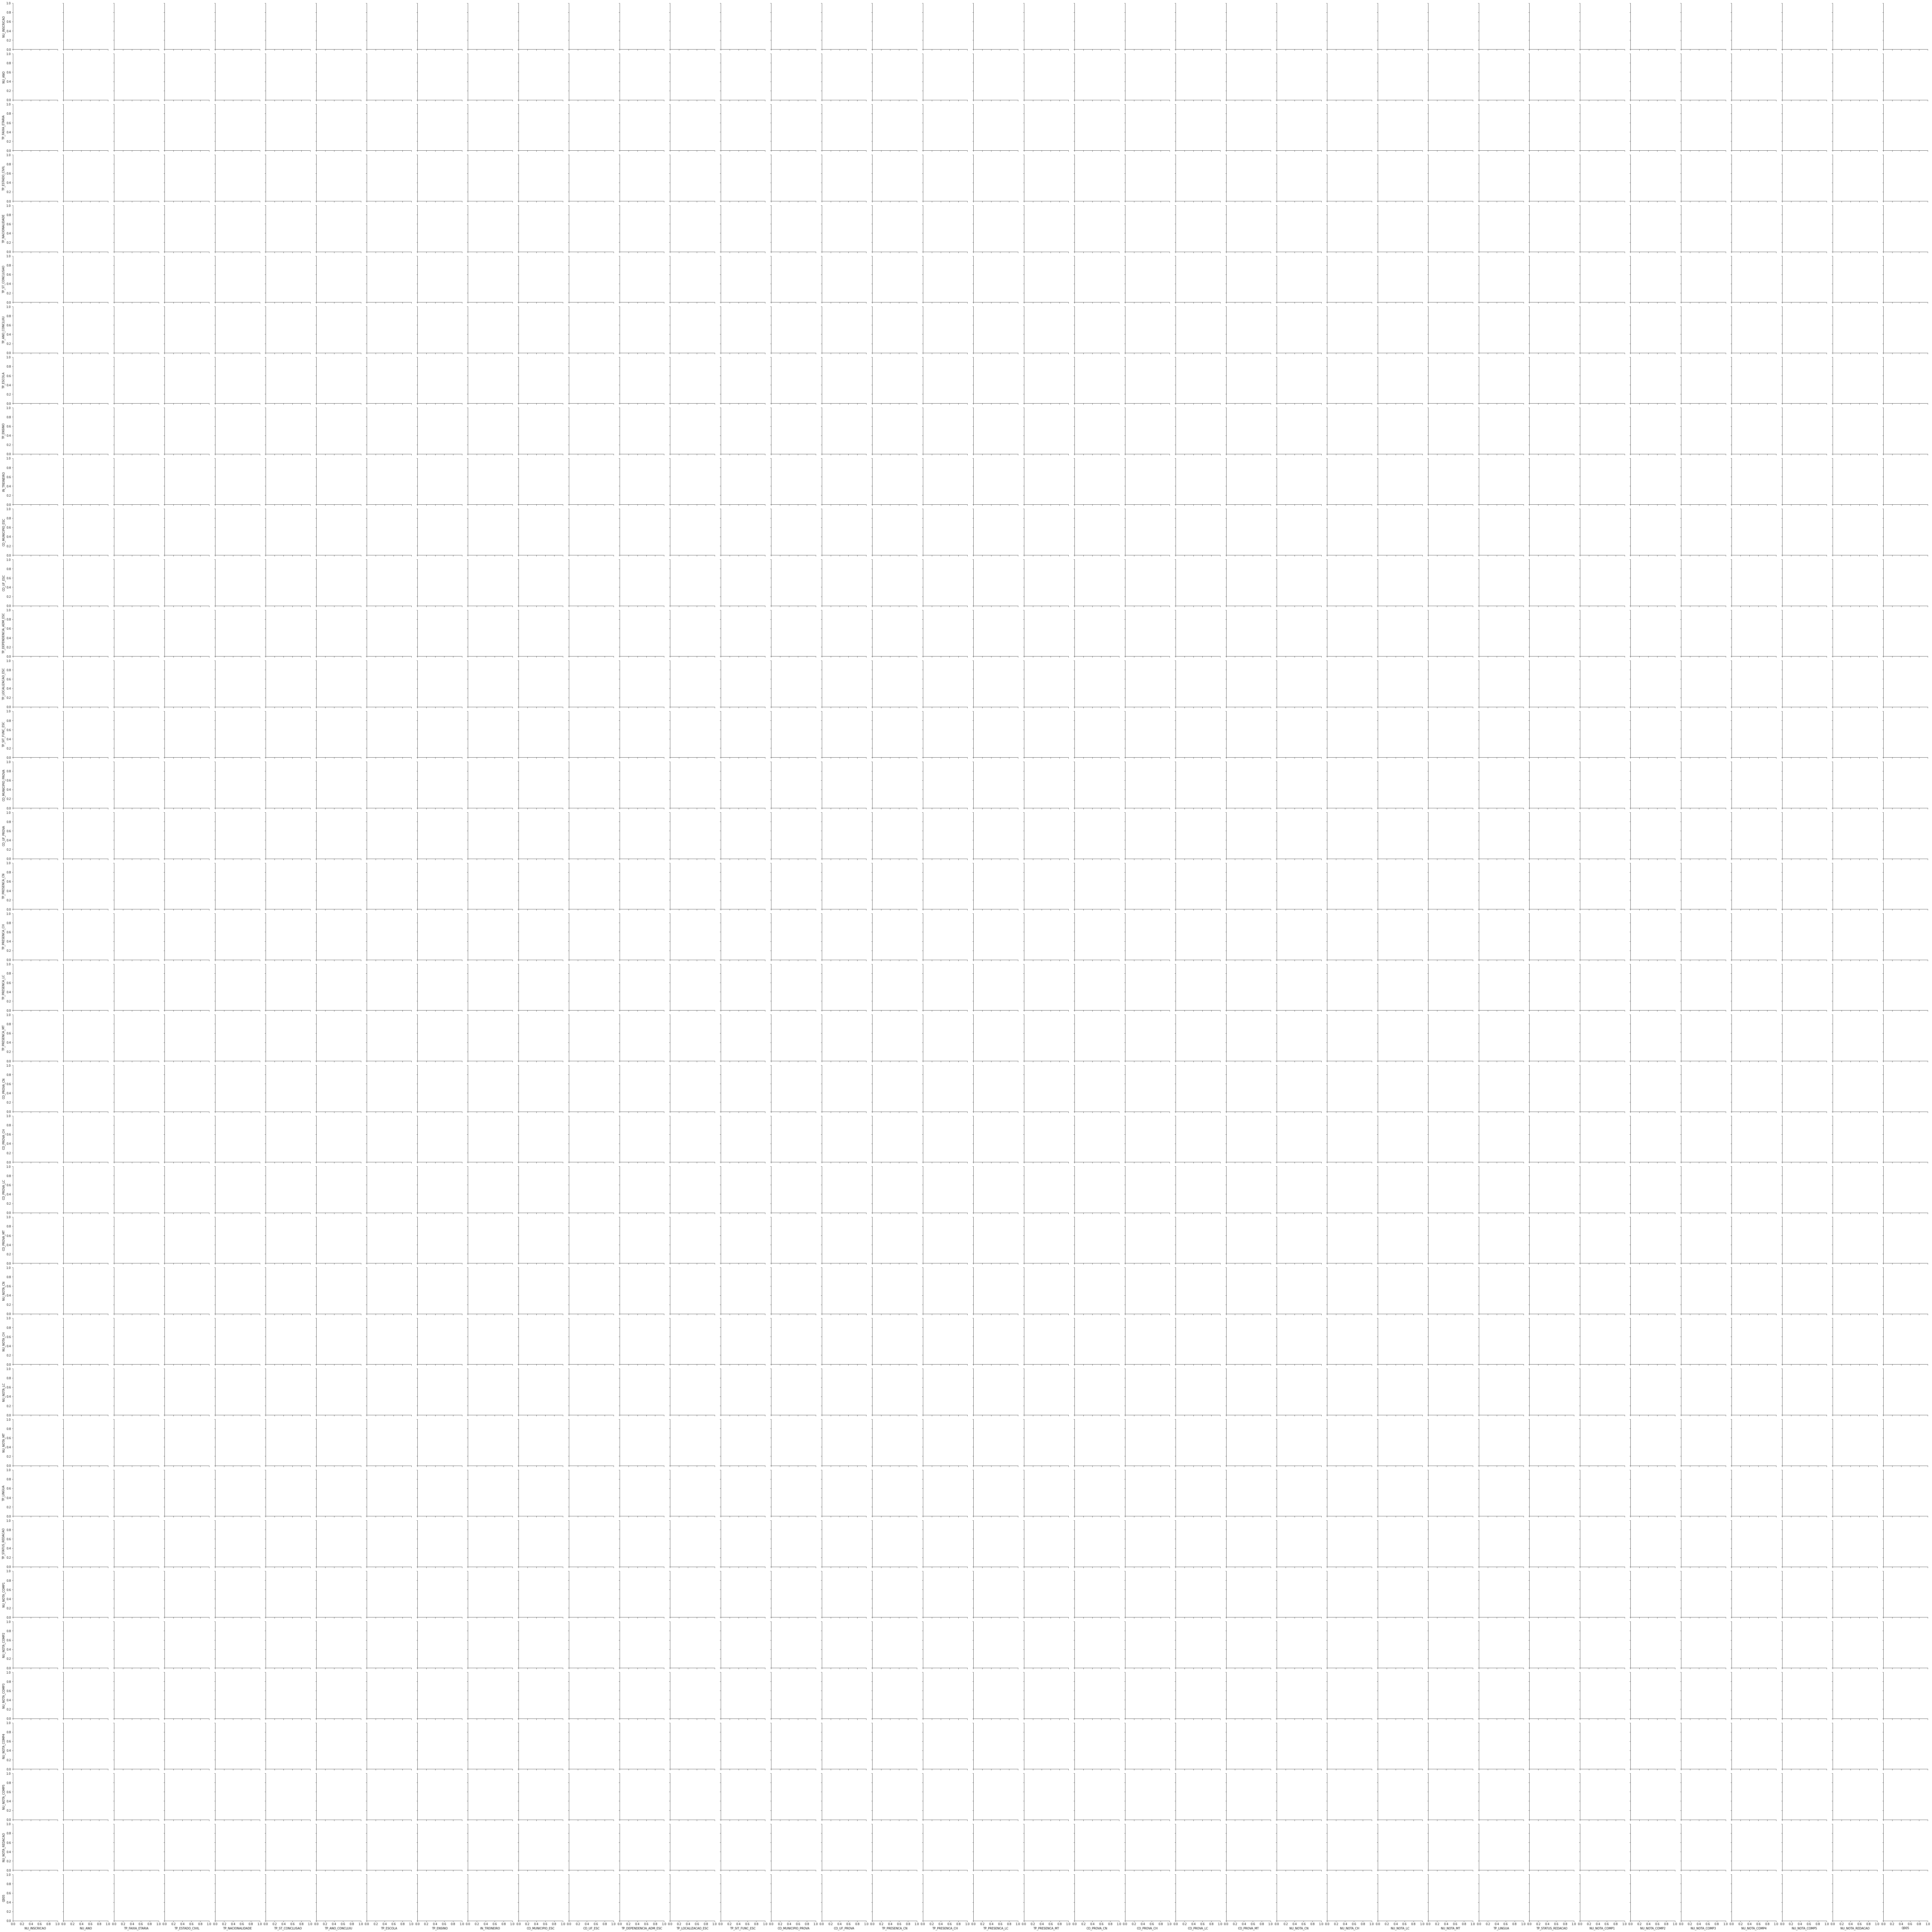

In [14]:
sns.pairplot(db)
plt.show()

Analise da variavel Target comparada a nota de ciencias humanas

In [11]:
cor = target.corr(nota_ch)
print(cor)

0.6352013472564912


Analise da variavel Target comparada a nota de ciencias da natureza

In [12]:
cor = target.corr(nota_cn)
print(cor)

0.6148343823764244


Analise da variavel Target comparada a nota de linguagens

In [13]:
cor = target.corr(nota_lc)
print(cor)

0.60496908786205


In [ ]:
# RANDOM FOREST REGRESSION
# ignora ater a hora de implementar
l_mean_p = []
l_mean_a = []
r2_scor = []

for i in range(30):
    #random forest regression
    model_RFR = RandomForestRegressor(n_estimators=i+1)
    model_RFR.fit(pd.get_dummies(X_train), Y_train)
    Y_pred = model_RFR.predict(pd.get_dummies(X_test))
 
    #metricas de analise
    l_mean_p.append(mean_absolute_percentage_error(Y_test, Y_pred))
    l_mean_a.append(mean_absolute_error(Y_test, Y_pred))
    r2_scor.append(r2_score(Y_test, Y_pred))